In [5]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

import sys
import matplotlib.pyplot as plt
import sklearn.decomposition as decomp
import sklearn.linear_model as linear_model
import sklearn.datasets as sk_data
from sklearn.preprocessing import StandardScaler
import numpy.linalg as nla
import sklearn.svm as svm
import pandas as pd
from scipy.io import loadmat
from pymatreader import read_mat
#import test-train split
from sklearn.model_selection import train_test_split
#import Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [6]:
H=pd.read_csv('/Users/inria/Desktop/M/TwinHouse.csv',sep=';',header=None)
W=pd.read_csv('/Users/inria/Desktop/M/TwinWeather.csv',sep=';',header=None)

In [7]:
# Inputs
Ti2 = H[7];    # temperature in living room at 187 cm (output)
Ti1=H[6];      # temperature in living room at 125 cm
Ti=H[5];     #temperature in living room at 67cm
Tk = H[11];   # kitchen
Td = H[12];   # doorway
Tcr = H[8];    # corridor
Tchl = H[10];  # Children room
Tb=H[13];    #Bed room
Ta = H[3];    # attic
Tg = H[4];    # cellar
Tv = H[29];   # ventilation supply air 
To = W[2];    # outdoor
Qn = W[5];    # Solar radiations from north
Qs = W[7];    # specific global solar vert. South
Qw = W[8];    # specific global solar vert. West
Qi = H[20];   # el. power living
Qk=H[23]+H[24]; #Kithcne power input minus duct losses
Qd=H[25]; #Doorway Heater
QB=H[26]; #Bedroom Heater

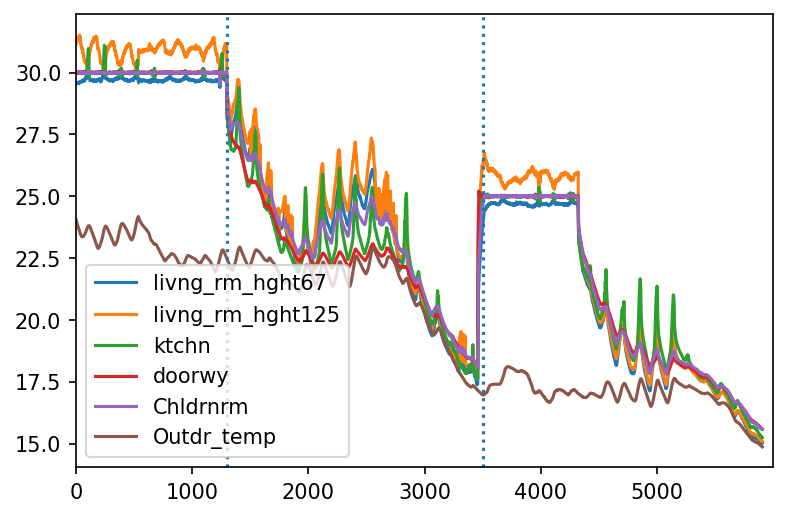

In [8]:
plt.figure(dpi=150)
plt.plot(Ti,label='livng_rm_hght67')
plt.plot(Ti2,label='livng_rm_hght125')
plt.plot(Tk,label='ktchn')
plt.plot(Td,label='doorwy')
plt.plot(Tchl,label='Chldrnrm')
plt.plot(Ta,label='Outdr_temp')
plt.axvline(x=1300,linestyle=':')
plt.axvline(x=3500,linestyle=':')
plt.xlim(0,6000)
plt.xticks((np.arange(0,6000,1000)))
plt.legend()
plt.savefig('Exp_temp.png')
plt.show()


In [5]:
df=pd.DataFrame([Ti,Ti1,Ti2,Tk,Td,Tcr,Tchl,Tb]).transpose()
df['14']=df.mean(axis=1).round(decimals=2)
df.columns=['Lving_rm67','Lving_rm125','Lving_rm187','Ktchn','crdr','Drwy','Chldrn_rm','Bed_rm','Tmean']
#plt.figure(dpi=150)
#df.plot(y=['Drwy','Chldrn_rm','Bed_rm','Tmean'],figsize=(12,9),xlim=(0,6000))

In [6]:
df=pd.DataFrame([Ti,Ti1,Ti2,Tk,Td,Tcr,Tchl,Tb]).transpose()
df['14']=df.mean(axis=1).round(decimals=3)
df.columns=['Lving_rm67','Lving_rm125','Lving_rm187','Ktchn','crdr','Drwy','Chldrn_rm','Bed_rm','Tmean']
# We create categories for Hot, Cold and Normal temperatures
category=pd.cut(df.Tmean,bins=[0,28,30,32],labels=['Normal','Hot','TooHot'])
#Insert the new category at 4th column
df.insert(9,'TEMP',category)
df

,Lving_rm67,Lving_rm125,Lving_rm187,Ktchn,crdr,Drwy,Chldrn_rm,Bed_rm,Tmean,TEMP
0,29.531048,29.986008,31.134912,29.986731,30.012228,30.049305,29.997070,30.000942,30.087,TooHot
1,29.547962,30.000132,31.157990,29.994390,29.999079,30.057949,30.006847,29.998449,30.095,TooHot
2,29.546320,29.972891,31.184851,30.008350,29.985352,30.067911,30.002213,30.000271,30.096,TooHot
3,29.556202,29.984280,31.223591,29.993240,30.002310,30.070709,30.000031,30.006247,30.105,TooHot
4,29.553158,29.997700,31.257040,30.005650,30.023932,30.071751,30.007252,30.000439,30.115,TooHot
...,...,...,...,...,...,...,...,...,...,...
5900,15.052640,15.071091,15.117129,15.262601,15.604040,15.695460,15.581810,16.120953,15.438,Normal
5901,15.049970,15.061041,15.116321,15.260260,15.601132,15.693260,15.573151,16.118481,15.434,Normal
5902,15.031240,15.060422,15.117849,15.256880,15.598860,15.690831,15.571490,16.113010,15.430,Normal
5903,15.033789,15.054210,15.108339,15.253000,15.593478,15.687030,15.560300,16.107492,15.425,Normal


In [33]:
df

,Lving_rm67,Lving_rm125,Lving_rm187,Ktchn,crdr,Drwy,Chldrn_rm,Bed_rm,Tmean,TEMP
0,29.531048,29.986008,31.134912,29.986731,30.012228,30.049305,29.997070,30.000942,30.087,TooHot
1,29.547962,30.000132,31.157990,29.994390,29.999079,30.057949,30.006847,29.998449,30.095,TooHot
2,29.546320,29.972891,31.184851,30.008350,29.985352,30.067911,30.002213,30.000271,30.096,TooHot
3,29.556202,29.984280,31.223591,29.993240,30.002310,30.070709,30.000031,30.006247,30.105,TooHot
4,29.553158,29.997700,31.257040,30.005650,30.023932,30.071751,30.007252,30.000439,30.115,TooHot
...,...,...,...,...,...,...,...,...,...,...
5900,15.052640,15.071091,15.117129,15.262601,15.604040,15.695460,15.581810,16.120953,15.438,Noheatng
5901,15.049970,15.061041,15.116321,15.260260,15.601132,15.693260,15.573151,16.118481,15.434,Noheatng
5902,15.031240,15.060422,15.117849,15.256880,15.598860,15.690831,15.571490,16.113010,15.430,Noheatng
5903,15.033789,15.054210,15.108339,15.253000,15.593478,15.687030,15.560300,16.107492,15.425,Noheatng


In [13]:

df=pd.DataFrame([Ti,Ti1,Ti2,Tk,Td,Tcr,Tchl,Tb]).transpose()

df.insert(8,'TEMP',np.arange(0,df.shape[0],1))
for i in np.arange(0,df.shape[0],1):
    if any((0<df.iloc[i,:8])&(df.iloc[i,:8]<=26))==True:
        df.iloc[i,8]='Normal'
    if any((26<df.iloc[i,:8])&(df.iloc[i,:8]<30))==True:
        df.iloc[i,8]='Hot'
    if any(30<=(df.iloc[i,:8]))==True:
        df.iloc[i,8]='TooHot'


In [14]:
import collections
counter=collections.Counter(df.iloc[:,8])
counter

Counter({'TooHot': 1297, 'Hot': 675, 'Normal': 3933})

In [ ]:
y=np.arange(0,df.shape[])

In [10]:
results_sns=[]
#Reduce the number of sensors
#for c in np.array(range(1,df.shape[1]-1,1)):
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:1],df.TEMP,test_size=0.4,random_state=101)
#Apply fitting of the data
#X_train=np.array(df.iloc[0:4000,1]).reshape(-1,1)
#y_train=df.TEMP[0:4000]
#y_test=df.TEMP[5001:5500]
#X_test=np.array(df.iloc[5001:5500,1]).reshape(-1,1)
logmodel=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=10000)
logmodel.fit(X_train,y_train)
#Predict the new values
predictions=logmodel.predict(X_test)
report=metrics.f1_score(y_test,predictions,average=None)
report

array([0.5106, 0.9973, 0.9873])

In [55]:
df.iloc[:,7:8]

,Bed_rm
0,30.000942
1,29.998449
2,30.000271
3,30.006247
4,30.000439
...,...
5900,16.120953
5901,16.118481
5902,16.113010
5903,16.107492


In [31]:
df.iloc[:,:1]

,Lving_rm67
0,29.531048
1,29.547962
2,29.546320
3,29.556202
4,29.553158
...,...
5900,15.052640
5901,15.049970
5902,15.031240
5903,15.033789


['precision',
 'recall',
 'f1-score',
 'support',
 'Cold',
 '1.00',
 '1.00',
 '1.00',
 '1821',
 'Hot',
 '1.00',
 '0.83',
 '0.91',
 '35',
 'TooHot',
 '0.99',
 '1.00',
 '1.00',
 '506',
 'accuracy',
 '1.00',
 '2362',
 'macro',
 'avg',
 '1.00',
 '0.94',
 '0.97',
 '2362',
 'weighted',
 'avg',
 '1.00',
 '1.00',
 '1.00',
 '2362']

In [139]:
results_sns=[]
#Reduce the number of sensors
#for c in np.array(range(1,df.shape[1]-1,1)):
#X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:c],df.TEMP,test_size=0.4,random_state=101)
#Apply fitting of the data
X_train=df.iloc[0:3000,:7]
y_train=df.TEMP[0:3000]
y_test=df.TEMP[3001:5500]
X_test=df.iloc[3001:5500,:7]
logmodel=LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=10000)
logmodel.fit(X_train,y_train)
#Predict the new values
predictions=logmodel.predict(X_test)
results_sns.append(metrics.balanced_accuracy_score(y_test,predictions))
#results.append(results_sns)
results_sns

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Cold'

[0.8341121495327103]

In [46]:
rs=pd.DataFrame(results_all)
rs

,0,1,2,3
0,"[0.9653267645228528, 0.9700697481620019, 0.968...","[0.9648064485346431, 0.9637681135789115, 0.964...","[0.9639586057404119, 0.965505621414278, 0.9674...","[0.9657901072267125, 0.9662142532541306, 0.968..."
1,"[0.9673422890524956, 0.9708714209259584, 0.966...","[0.9686673403915727, 0.9736164629619694, 0.967...","[0.9616151914280239, 0.9666586367052377, 0.971...","[0.9812345147757139, 0.9815622029357449, 0.971..."
2,"[0.9697537315953383, 0.9686504813446838, 0.966...","[0.972451966681823, 0.9749682846764185, 0.9703...","[0.9673276399444672, 0.9739961047628635, 0.970...","[0.9759686757670774, 0.9684492194392115, 0.972..."
3,"[0.9697596707187587, 0.9719889786112086, 0.974...","[0.9695093383263718, 0.9731145464441723, 0.971...","[0.9741210796348851, 0.9743216894888412, 0.965...","[0.9739324277255311, 0.9773319400905608, 0.969..."


In [47]:
x=np.array(results_all)
index=pd.MultiIndex.from_product([range(s) for s in x.shape],names=['X','Y','Z'])
rs = pd.DataFrame({'x': x.flatten()}, index=index)['x']
rs = rs.unstack(level='X').swaplevel().sort_index()
rs.columns = ['Comp_1', 'Comp_2', 'Comp_3','Comp_4']
rs.index.names = ['Sensors_removed','Sampling Rate']
rs.index.set_levels([ 
                       df.columns,['5905','4465','3025','1585']], inplace=True)


/var/folders/0b/f9crck810477r2yg4k9mg_dc0000gp/T/ipykernel_1089/3136240306.py:7: FutureWarning: inplace is deprecated and will be removed in a future version.
  rs.index.set_levels([


In [155]:
rs

Comp_1    Comp_2    Comp_3    Comp_4
Sensors_removed Sampling Rate                                        
Lving_rm67      5905           0.965869  0.968391  0.971280  0.972357
                4465           0.970186  0.967130  0.970788  0.965682
                3025           0.967368  0.971879  0.965318  0.970877
                1585           0.973279  0.967021  0.972070  0.960194
Lving_rm125     5905           0.972508  0.971668  0.974576  0.970930
                4465           0.973404  0.970365  0.973433  0.968308
                3025           0.971403  0.973082  0.970476  0.968915
                1585           0.974082  0.970275  0.971891  0.965020
Lving_rm187     5905           0.968170  0.964704  0.965375  0.971840
                4465           0.969926  0.973932  0.977427  0.961977
                3025           0.967369  0.971627  0.968417  0.966198
                1585           0.967616  0.954746  0.958456  0.962778
Ktchn           5905           0.976844  0.972145  0.968120  0.975416
                4465           0.974599  0.969646  0.976580  0.974693
                3025           0.968073  0.970014  0.971671  0.977710
                1585           0.980379  0.972923  0.962675  0.963728
Drwy            5905           0.989918  0.990735  0.987306  0.990253
                4465           0.989790  0.988152  0.994590  0.988047
                3025           0.988092  0.992633  0.989815  0.993687
                1585           0.993248  0.998010  0.987837  0.984427
Chldrn_rm       5905           0.973575  0.968936  0.964771  0.973373
                4465           0.973772  0.968563  0.973062  0.973449
                3025           0.961329  0.970947  0.968045  0.971444
                1585           0.978048  0.981984  0.963948  0.965569
Bed_rm          5905           0.999181  0.998919  0.998662  0.998078
                4465           0.999263  0.997452  0.998595  0.998591
                3025           0.996732  0.996248  0.995787  1.000000
                1585           1.000000  0.998010  1.000000  0.998955

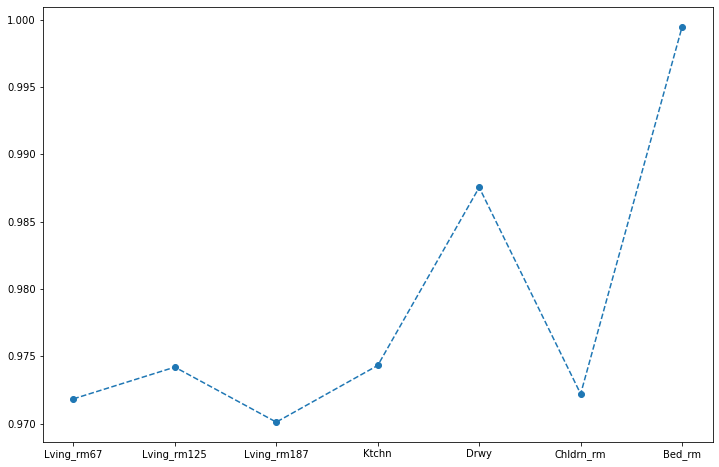

In [48]:
fig,axes=plt.subplots(figsize=(12,8))
axes.plot(rs.groupby('Sensors_removed').mean().index,rs.groupby('Sensors_removed').mean().Comp_4,linestyle='dashed',marker='o')
#plt.xticks(rotation=30)
plt.savefig('sensors.png')
plt.show()


In [129]:
rs.groupby('Sensors_removed').mean().index

Index(['Lving_rm67', 'Lving_rm125', 'Lving_rm167', 'Ktchn', 'Drwy',
       'Chldrn_rm', 'Bed_rm'],
      dtype='object', name='Sensors_removed')

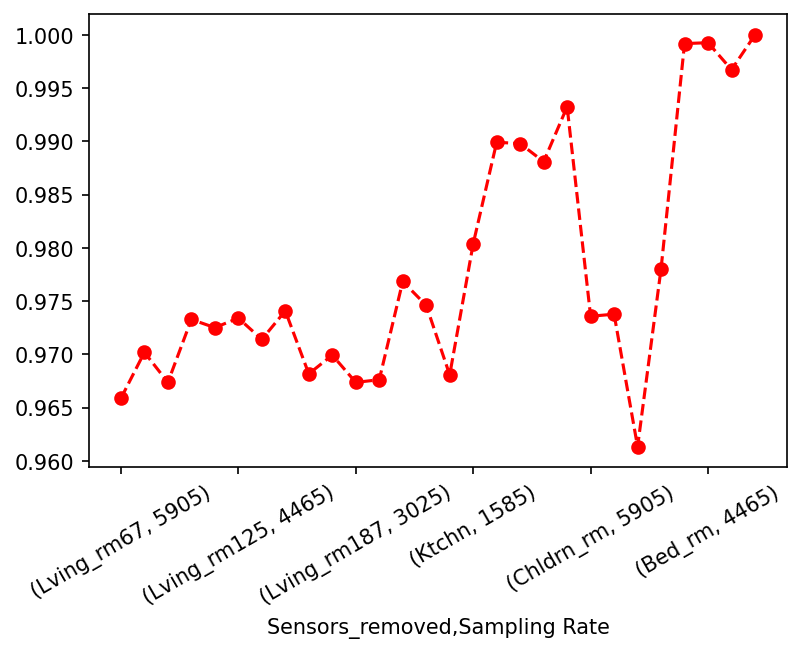

In [167]:
plt.figure(dpi=150)
rs.Comp_1.plot(linestyle='dashed',marker='o',color='red')
plt.xticks(rotation=30)
plt.show()

In [90]:
rs.iloc[:,0]

Sensors_removed  Sampling Rate
Lving_rm67       5905             0.973075
                 4465             0.974543
                 3025             0.965746
                 1585             0.958971
Lving_rm125      5905             0.981939
                 4465             0.981207
                 3025             0.983200
                 1585             0.973868
Lving_rm167      5905             0.968782
                 4465             0.964401
                 3025             0.960633
                 1585             0.954044
Ktchn            5905             0.973317
                 4465             0.973017
                 3025             0.975734
                 1585             0.971470
Drwy             5905             0.989494
                 4465             0.989899
                 3025             0.991119
                 1585             0.984347
Chldrn_rm        5905             0.974480
                 4465             0.974526
                 3025  